# Finding the Best Two Markets to Advertise In

**About:**

An e-learning company which offers courses on programming want to promote their products and invest some money in advertisement. Most of courses are on web and mobile development, but also cover many other domains, like data science, game development, etc.

**Goal:**

Our goal in this project is to find out the two best markets to advertise product in.

## Understanding the Data

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first. 

One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run [a popular Medium publication](https://medium.freecodecamp.org/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey). Below, we'll do a quick exploration of the `2017-fCC-New-Coders-Survey-Data.csv` file stored in the `clean-data` folder of the repository we just mentioned. We'll read in the file using the direct link [here](https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv).

In [1]:
# Importing nesesary libraries
import pandas as pd

# Read in the data
direct_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
survay = pd.read_csv(direct_link, low_memory = 0) # low_memory = False to silence dtypes warning

In [2]:
# Quick exploration of the data
print(survay.shape)
pd.options.display.max_columns = 150 # to avoid truncated output 
survay.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

##  Checking for Sample Representativity

As mentioned earlier, most of offered courses are on web and moblie development, but also cover many other domains like data science, game development, etc.

For the purpose of analysis, we want to know answer for following questions.
- Our target population is the new coders who are interested in online learning, we could like to know the demographics of these new coders, specifically,
    - Where are they located?
    - Where (which region) has the greatest number of new coders?
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

So we first need to clarify whether the data set has the right categories of people for our purpose. The `JobRoleInterest` column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. So let's take a look at the frequency distribution table of this column and determine whether the data we have is relevant.

In [3]:
survay['JobRoleInterest'].value_counts(normalize=True) * 100

Full-Stack Web Developer                                                                                                                                                                          11.770595
  Front-End Web Developer                                                                                                                                                                          6.435927
  Data Scientist                                                                                                                                                                                   2.173913
Back-End Web Developer                                                                                                                                                                             2.030892
  Mobile Developer                                                                                                                                                                      

From the frequency distribution table above, we know that there are 3213 distinct entries and the information they contain are quite granular but we can easy see that:
- lot of people are interested in web development,
- few people are interested in mobile development
- few people are interested in domains other than web and mobile development.

we can also notice that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests. 

To do that, we'll:
- split each string in the `JobRoleInterest` column to find the number of options for each participant,
- drop the null values which can't be splited,
- generate a frequency table for the variable describing the number of options.

In [4]:
# Remove rows with a null value
interests = survay['JobRoleInterest'].dropna()
# Split each string in the row by "," to get the imput titles
splitted_interests = interests.str.split(',')
print(splitted_interests.head(3))

1                           [Full-Stack Web Developer]
2    [  Front-End Web Developer,  Back-End Web Deve...
3    [  Front-End Web Developer,  Full-Stack Web De...
Name: JobRoleInterest, dtype: object


In [5]:
# Frequency table for the var describing the number of options
number_of_interests = splitted_interests.apply(lambda x: len(x)) 
# x is the a list of options
number_of_interests.value_counts(normalize=True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

From above table we see that only 31.65% of the participants have a clear idea about what programming niche they'd like to work in, while 68.35% of students have mixed interests. As we offer courses on a variety of topic this can be a good thing.

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.

In [6]:
# Frequency table
web_or_mobile = interests.str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


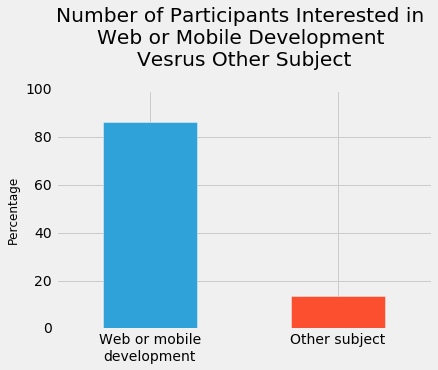

In [7]:
# Graph for the frequency table above
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Number of Participants Interested in \nWeb or Mobile Development \nVesrus Other Subject',
          y = 1.08)
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0)
plt.ylim([0,100])
plt.show()

As we can see ina bowe graph most people in this survey (roughly 86%) are interested in either web or mobile development. This give us the confidence that we are targeting the population of interest with this dataset, since we want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:
- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

## New Coders - Locations and Densities

Now that we know that the sample has the right categories of info for our investigation, we can proceed and begin our analysis. We will start with finding out where these new coders are located, and how many coders there are (i.e. density) for each location.

The `CountryCitizen` variable describes the country of origin for each participant and the `CountryLive` variable describe what country each participants lives in. For our analysis we will work with `CountryLive` because we are interested where people live at the moment we run ads. For marketing purpose, we can think of each country as an individual market and then frame our goal as finding the two best countries to advertise in.

We will use the number of potential customers in a country as the indicator for a good market and identify the top 2 countries with most "new coders" to invest our advisements.

In [8]:
# Isolate the participants that answered what role they'd be interested in
survay_good = survay[survay['JobRoleInterest'].notnull()].copy()


# Frequency tables with absolute and relative frequencies
absolute_frequencies = survay_good['CountryLive'].value_counts()
relative_frequencies = survay_good['CountryLive'].value_counts(normalize = True) * 100

# Display the frequency tables in a more readable format
pd.DataFrame(data = {'Absolute frequency': absolute_frequencies, 
                     'Percentage': relative_frequencies})

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


Our analysis show that 45.7% of our potential customers are located in USA and it seems like the most interesting market. India is the second highest, but far below at 7.7% and these score is not too far from the United Kingdom (4.6%) or Canada (3.8%).

To decide which country to choose as a runner-up, we need to go deeper than population density alone. We also need to find out how much money people are actually willing to spend on education. Because it's unlikely to be profitable to advertise in markets with a high population density but a low rate of funds spent on their education.

## Spending Money for Learning

In previous step we found usefull information about the location of new coders and identified the US, India, the United Kingdom and Canada are the four countries with most potential learners. But before making a decision we need to figure out how much monry new coders actually willing to spend on learing.

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

We will start by creating new column which describe the amount of monry a student has spend per month. To do that we will use informtion form column `MoneyForLearning` and divide it with values form `MonthsProgramming`. The problem is that some students answered that they have been learning to code for 0 months (it might be that they have just started). To avoid dividing by 0, we'll replace 0 with 1 in the MonthsProgramming column.

In [9]:
# Replace 0s with 1s to avoid division by 0
survay_good['MonthsProgramming'].replace(0, 1, inplace = True)

# New column for the amount of money each student spends each month
survay_good['money_per_month'] = survay_good['MoneyForLearning'] / survay_good['MonthsProgramming']

In [10]:
# Finding how many null vallues are in new column
survay_good['money_per_month'].isnull().sum()

675

Let's keep only the rows that don't have null values for the `money_per_month` column.

In [11]:
# Keep only the rows with non-nulls in the `money_per_month` column 
survay_good = survay_good[survay_good['money_per_month'].notnull()]

We want to group the data by country, and then measure the average amount of money that students spend per month in each country. First, let's remove the rows having null values for the `CountryLive` column, and check out if we still have enough data for the four countries that interest us

In [12]:
# Finding how many null vallues are in CountryLive column
survay_good['CountryLive'].isnull().sum()

105

In [13]:
# Remove the rows with null values in 'CountryLive'
survay_good = survay_good[survay_good['CountryLive'].notnull()]

# Frequency table to check if we still have enough data
survay_good['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

This should be enough, so let's compute the average value spent per month in each country by a student. We'll compute the average using the mean.

In [14]:
# Mean sum of money spent by students each month
countries_mean = survay_good.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America', 'India', 
                                   'United Kingdom', 'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

It is somewhat surprising to find that people in the UK and Canada spent less on learning than people in India, when comparing to their respective socio-economical metrics (like GDP per capita). 

One possible explaination is that our dataset has some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. Also it might be that we don't have have enough representative data for the United Kingdom and Canada or the results are correct.

## Dealing with Extreme Outliers

Let's use box plots to visualize the distribution of the money_per_month variable for each country and check if there are any outliers.

In [15]:
# Isolate only the countries of interest
top_4 = survay_good[survay_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


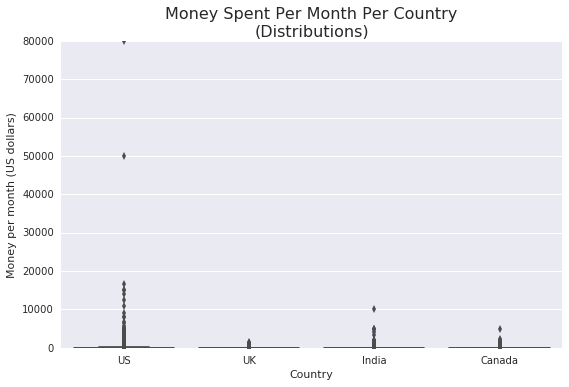

In [16]:
# Box plots to visualize distributions
import seaborn as sns

sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = top_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) 
# avoids tick labels overlap
plt.show()

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US:  two persons spent 50,000 and 80,000 per month! Although it is possible, most likely they are key_in errors. We will remove them from the data and then remake the box plots again.

Now let's recompute the mean values and plot the box plots again.

In [17]:
# Recompute mean sum of money spent by students each month
countries_mean = survay_good.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


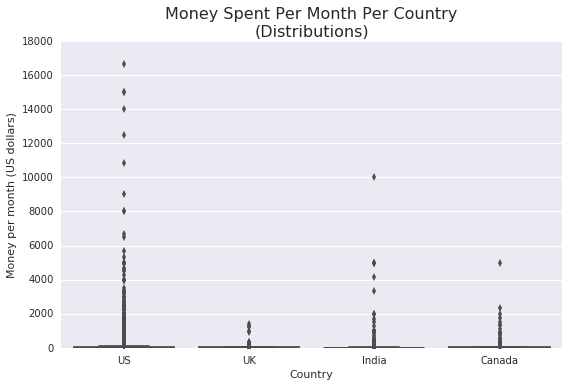

In [18]:
# Isolate only those participants who spend less than 20000 per month
survay_good = survay_good[survay_good['money_per_month'] < 20000]

# Isolate only the countries of interest
top_4 = survay_good[survay_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = top_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) 
plt.show()

We can see a few extreme outliers for India (values over $2500 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.

In [19]:
# Inspect the extreme outliers for India
india_outliers = top_4[(top_4['CountryLive'] == 'India') & 
                       (top_4['money_per_month'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,Na

It seems that neither participant attended a bootcamp. It's really hard to figure out whether these persons really spent that much money with learning. It seems safer to remove these two rows.

In [20]:
# Remove the outliers for India
top_4 = top_4.drop(india_outliers.index) # using the row labels

Looking back at the box plot above, we can also see more extreme outliers for the US (values over $6000 per month). Let's examine these participants in more detail.

In [21]:
# Inspect the extreme outliers for US
us_outliers = top_4[(top_4['CountryLive'] == 'United States of America') & 
                       (top_4['money_per_month'] >= 6000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

AS we can see in abowe table out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In [26]:
# Remove the respondents who didn't attendent a bootcamp
no_bootcamp = top_4[(top_4['CountryLive'] == 'United States of America') & 
                    (top_4['money_per_month'] >= 6000) &
                    (top_4['AttendedBootcamp'] == 0)]

top_4 = top_4.drop(no_bootcamp.index)

In [28]:
# Remove the respondents that had been programming for less than 3 months
less_than_3_months = top_4[(top_4['CountryLive'] == 'United States of America') & 
                           (top_4['money_per_month'] >= 6000) &
                           (top_4['MonthsProgramming'] <= 3)]

top_4 = top_4.drop(less_than_3_months.index)

Looking again at the last box plot above, we can also see an extreme outlier for Canada — a person who spends roughly $5000 per month. Let's examine this person in more depth.

In [29]:
# Inspect the extreme outliers for Canada
canada_outliers = top_4[(top_4['CountryLive'] == 'Canada') & 
                       (top_4['money_per_month'] >= 5000)]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


As we can see the situation here is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. We'll take the same approach here as for the US and remove this outlier.

In [32]:
# Remove the outliers for Canada
top_4 = top_4.drop(canada_outliers.index)

Let's recompute the mean values and generate the final box plots.

In [33]:
# Recompute mean sum of money spent by students each month
top_4.groupby('CountryLive').mean()['money_per_month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


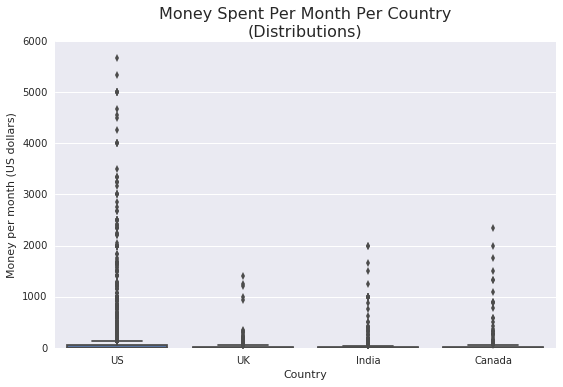

In [34]:
# Box plots to visualize distributions
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = top_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) 
plt.show()

To summarized our analysis so far: the US still occupies the first place in both population size and money to spend on learning, while Canada became the second place in money to spend on learning.

## Choosing the Two Best Markets

One country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month. Also the data sugest strongly that we shouldn't advertise in the UK.

In [37]:
# Frequency table for the 'CountryLive' column
top_4['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

The other option to choose are Canada and India. But it is still not clear we should with one we should picked. India has larger market size (11.7% vs 6.1%), but Canada has more money to spend on learning (93.1 vs 65.8). Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:
- Advertise only in the US.
- Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:
    - 60% for the US, 25% for India, 15% for Canada.
    - 50% for the US, 30% for India, 20% for Canada; etc.
- Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:
    - 70% for the US, and 30% for India.
    - 60% for the US, and 40% for Canada; etc.


At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.